In [71]:
import pandas as pd
import numpy as np
import statistics  as sts
import seaborn as srn
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima

In [70]:
#from google.colab import files
#readed = files.upload()
pip install pmdarima

SyntaxError: ignored

In [41]:
df = pd.read_csv('/content/drive/MyDrive/Projetos/Data/EURUSD_H1_201001040000_202012182100.csv',sep='\t').rename(columns={'<CLOSE>':'Close','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low','<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>'])

In [73]:
df2 = pd.read_csv('test.csv',sep='\t').rename(columns={'<CLOSE>':'Close','<DATE>':'Date','<TIME>':'Time','<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low','<TICKVOL>':'TickVol'}).drop(columns=['<VOL>','<SPREAD>'])

In [37]:
df.head()

,Time,Open,High,Low,Close,TickVol
<DATE>,,,,,,
2010.01.04,00:00:00,1.43259,1.43336,1.43151,1.43153,969
2010.01.04,01:00:00,1.43151,1.43153,1.42879,1.42886,2098
2010.01.04,02:00:00,1.42885,1.42885,1.42569,1.42705,2082
2010.01.04,03:00:00,1.42702,1.42989,1.42700,1.42939,1544
2010.01.04,04:00:00,1.42938,1.42968,1.42718,1.42848,1131


In [4]:
df.shape

(67999, 7)

In [5]:
df.isnull().sum()

Date       0
Time       0
Open       0
High       0
Low        0
Close      0
TickVol    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


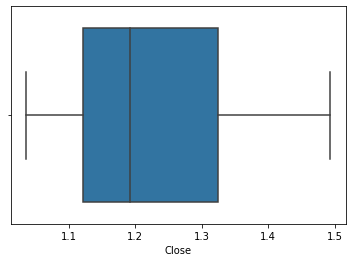

In [6]:
srn.boxplot(df['Close'])

In [51]:
st = pd.DataFrame(data=(df['Close'].diff(),df['Date'])).T

In [52]:
st 

,Close,Date
0,NaN,2010.01.04
1,-0.00267,2010.01.04
2,-0.00181,2010.01.04
3,0.00234,2010.01.04
4,-0.00091,2010.01.04
...,...,...
67994,-0.00026,2020.12.18
67995,3e-05,2020.12.18
67996,0.00015,2020.12.18
67997,0.00053,2020.12.18


In [53]:
st['Date'] = pd.to_datetime(st['Date'])

In [60]:
st=st.set_index(['Date'])
st.head()

KeyError: ignored

In [61]:
st=st.dropna()
st.head()

,Close
Date,
2010-01-04,-0.00267
2010-01-04,-0.00181
2010-01-04,0.00234
2010-01-04,-0.00091
2010-01-04,0.00049


In [92]:
st2 = pd.DataFrame(data=(df2['Close'].diff(),df2['Date'])).T
st2.head()

,Close,Date
0,NaN,2020.10.01
1,-0.003,2020.10.02
2,0.0066,2020.10.05
3,-0.00491,2020.10.06
4,0.00294,2020.10.07


In [93]:
# Convert your daily column from just string to DateTime (skip if already done)
st2['Date'] = pd.to_datetime(st2['Date'])
# Set the column 'Date' as index (skip if already done)
st2 = st2.set_index('Date')
# Specify datetime frequency
st2 = st2.asfreq('D')
st2.index

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
      

In [97]:
st2.head()
st2 = st2.dropna()

In [98]:
modelo = ARIMA(st2, order=(2, 1, 2))

ValueError: ignored